# HW7 - Modeling Pandemics
Submit as *firstname_lastname-HW7.ipynb*

### Question 1
Immunological memory does indeed degrade over time. Recall from the lectures that we can model imperfect immunity using the following two equations

$$\dot{I} = \alpha I S - \frac{I}{\tau_{inf}}$$
$$\dot{S} = -\alpha I S + \frac{N - I - S}{\tau_{imm}}$$

The S-nullcline is a set of points in the phase plane where $\dot{S} = 0$. Geometrically speaking, these are the
points where the vectors point directly towards or away from the S-axis (horizontal in our example). Algebraically, we find the S-nullcline by solving $\dot{S} = 0$. 

Find the I and S nullclines. Define a python function for them and plot them on top of a quiver plot representing phase space. 
Use $\alpha = 0.4$, $\tau_{inf} = 0.1$, $\tau_{imm} = 3$. Plot phase space from 0 to 100 for $\dot{S}$ and $\dot{I}$ axes. 


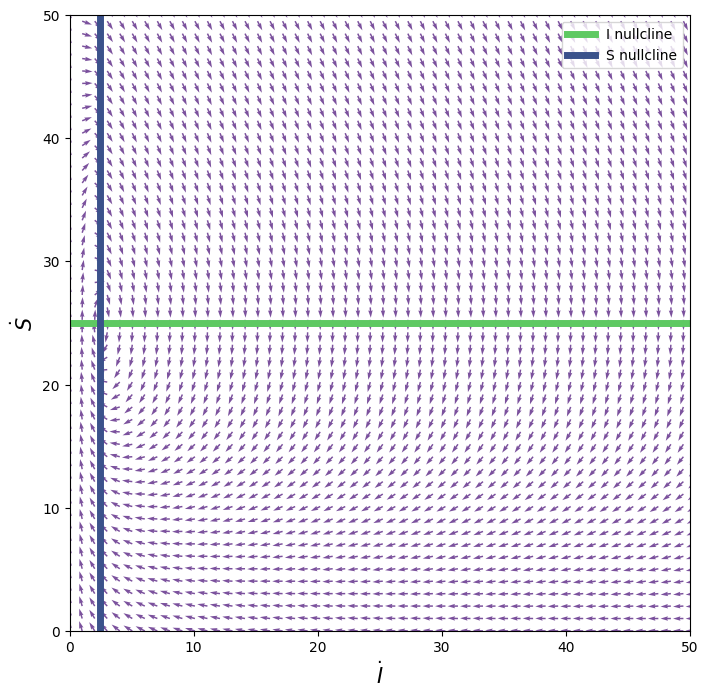

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# define parameters
alpha = 0.4
tau_inf = 0.1
tau_imm = 3
N = 100

# nullcline functions
def get_nullclines(S, I):
    I_nullcline = 1 / (alpha * tau_inf)
    S_nullcline = tau_inf * (N - 1 / (alpha * tau_inf)) / (tau_imm + tau_inf)
    return (S_nullcline, I_nullcline)

# define axis ranges
I_range = np.linspace(0, 100, 100)
S_range = np.linspace(0, 100, 100)

# define meshgrid
I_grid, S_grid = np.meshgrid(I_range, S_range)

# calculate derivatives
dI_dt = alpha * I_grid * S_grid - (I_grid / tau_inf)
R = (N - I_grid - S_grid)
dS_dt = -alpha * I_grid * S_grid + R / tau_imm

# normalize vector lengths by the hypoteneuse
hypo_len = (np.hypot(dI_dt,dS_dt))
hypo_len[hypo_len==0] = 1.0
dI_dt /= hypo_len
dS_dt /= hypo_len

# plot phase space diagram
plt.figure(figsize=(8,8), dpi=100)
plt.quiver(I_grid, S_grid, dI_dt, dS_dt, scale=60, color='#7b519d')
plt.plot(I_range, get_nullclines(S_range, I_range)[1]*np.ones(100), linewidth=5, label='I nullcline', color='#5ec962')
plt.plot(get_nullclines(S_range, I_range)[0]*np.ones(100), S_range, linewidth=5, label='S nullcline', color='#3b528b')
plt.xlabel(r'$\dot{I}$', fontsize=15, fontweight='bold')
plt.ylabel(r'$\dot{S}$', fontsize=15, fontweight='bold')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.legend()
plt.show()

## Question 2.1 - Seasonal Variation

There are many extensions of this model to capture important relevant dynamics.
One important class deals with the seasonal variation in the transmission rate parameter $\alpha$. For example, in the 1918 spanish flu there was a decrease in susceptibility in the summer followed by an increase in susceptibility in the fall which created large spikes in infected individuals. This could also represent scientifically ignorant politicians making, what they think are politically expedient decisions, by bringing people back to work too early. 

These variations can be modeled by placing the fixed parameter $\alpha$ with a *forcing function* $\alpha(t)$.
Let's compare these variations and see how time-varying $\alpha(t)$ effects the dynamics of $I$. 

* Plot the I, S, and R as a function of t over `t = np.linspace(0,10,1000)` using the following parameters:


In [ ]:
a = .4
tau = .1
tau2 = 3
state0 = [1,99]
N = np.sum(state0)

## Question 2.2 - Seasonal Variation
To implement $\alpha(t)$ make a new function bearing the differential equations but this time with $\alpha = $ `a*(sin(t)+1)`. Make sure you replace all instances of $\alpha$.

* Plot it with the exact same parameters as above. Describe what happens in a markdown cell below. Although you can't plot the phase portrait using a static graph, imagine that it is shifting with shifting $\alpha$. What is the I-nullcline doing?


## Question 2.3 - The Effect of Frequency
If the period of $\alpha(t)$'s oscillations is fast relative to the timescale of the SIR dynamics then there are small outbreaks and $S$ remains close to $N$. If the period is slower then $I$ can get higher. 

Examine this by doing the following:

* Build a for loop and run the simulation over a range of sinusoidal frequencies from `freqs = pi*np.array([.25,.5,1,2,4])`

* Sum the total number of Infected individuals and plot them as a function of frequency. What is the frequency that gives the greates integrated number of infections?


## Question 2.4 - Extra Credit
Investigate non-sinusoidal oscillations. Which waveforms engender the worst epidemics?

## Question 3 - Latency

In many diseases, some amount of time passes between being infected and being able to pass the virus to others. This period is called a *latent period*. To capture this we can add a third state variable to our imperfect immunity model described in Question 1, lets call it $X$, which keeps track of exposed individuals. 

* Create a function with expressing these differential equations, where there is a third timescale parameter, $\tau_{lat}$
* Simulate and plot the 3 quantities as a function of time starting with 1 infected individual, 99 susceptible, and 0 exposed. 
* The non-trivial equilibrium point $(I, X, S) = (0, 0, N)$ is unstable. What are the coordinates of the *endemic equilibrium point*? (Show you work as an attached photo if necessary).



## Question 3 - Extra Credit
* The phase space is now in 3D and the nullclines are now planes through that space. 
* Solve for the nullclines. Plot them and plot a cube of vectors representing phase space. 

## Question 4 - Thinking about your final assignment.

For the final assignment I would like you to find a mathematical model representing any aspect of a biological system, attempt to reproduce it in python and the results, and use it to ask a new scientifically relevant question. You (and your team) will submit a single python notebook as well as a written report of your findings. If the paper has already used python then it will not be allowed. 

* Please tell me who you plan to work with and submit the titles and links to 3 scientific papers that you are interested in exploring for this assignment. 